## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import scipy.stats as stats
from math import sqrt
import numpy as np
from numbers import Number
from math import sqrt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import folium
df = pd.read_csv('data/kc_house_data.csv')
df_names = pd.read_table('data/column_names.md')

In [2]:

import geopandas as gpd 
from shapely.geometry import Point,Polygon
%matplotlib inline 
import numpy as np
import datetime as dt
from sklearn import metrics
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
map = df 
map_2 = gpd.GeoDataFrame(map,geometry=gpd.points_from_xy(map.lat,map.long))

In [ ]:
#date is the date the house was sold 

In [3]:
df["date"]=pd.to_datetime(df['date'])

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
#import folium
#lat = df['lat'].iloc[:600]
##long = df['long'].iloc[:600]
#price = df['price'].iloc[:600]

#Create a map of the area
#base_map = folium.Map([lat.mean(), long.mean()], zoom_start=13)
#i=0
#for lat1,long1 in zip(lat,long):
     #popup_text = 'Lat: {} \n Long: {}'.format(lat1,long1) #Modify this to change marker popup
     #popup = folium.Popup(popup_text, parse_html=True)
     #marker = folium.Marker(location=[lat1, long1], popup = popup)
     #marker.add_to(base_map)
     #i+=1
     
#base_map

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [6]:

#test = df[['price','zipcode','sqft_living','grade','bedrooms','bathrooms']].copy()
#test.dropna(inplace=True)
#test.sort_values(by='price',ascending = False)


In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15762 non-null  int64         
 1   date           15762 non-null  datetime64[ns]
 2   price          15762 non-null  float64       
 3   bedrooms       15762 non-null  int64         
 4   bathrooms      15762 non-null  float64       
 5   sqft_living    15762 non-null  int64         
 6   sqft_lot       15762 non-null  int64         
 7   floors         15762 non-null  float64       
 8   waterfront     15762 non-null  object        
 9   view           15762 non-null  object        
 10  condition      15762 non-null  object        
 11  grade          15762 non-null  object        
 12  sqft_above     15762 non-null  int64         
 13  sqft_basement  15762 non-null  object        
 14  yr_built       15762 non-null  int64         
 15  yr_renovated   1576

In [9]:
df['grade'].unique()

array(['7 Average', '8 Good', '11 Excellent', '9 Better', '6 Low Average',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [10]:
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [11]:
df_new = df.drop(columns=['sqft_above','sqft_living15','sqft_lot15','grade','id','sqft_basement'])

In [12]:
df_new['yr_renovated']= df_new['yr_renovated'].astype(int)

In [13]:
df_new['yr_renovated'].value_counts()

0       15111
2014       64
2013       29
2005       27
2000       25
        ...  
1967        1
1934        1
1944        1
1950        1
1974        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
df_new

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,1951,1991,98125,47.7210,-122.319
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,1965,0,98136,47.5208,-122.393
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,1987,0,98074,47.6168,-122.045
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,2001,0,98053,47.6561,-122.005
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,NO,NONE,Average,1995,0,98003,47.3097,-122.327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2015-02-19,475000.0,3,2.50,1310,1294,2.0,NO,NONE,Average,2008,0,98116,47.5773,-122.409
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,2009,0,98103,47.6993,-122.346
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,2014,0,98146,47.5107,-122.362
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,2009,0,98144,47.5944,-122.299


In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          15762 non-null  datetime64[ns]
 1   price         15762 non-null  float64       
 2   bedrooms      15762 non-null  int64         
 3   bathrooms     15762 non-null  float64       
 4   sqft_living   15762 non-null  int64         
 5   sqft_lot      15762 non-null  int64         
 6   floors        15762 non-null  float64       
 7   waterfront    15762 non-null  object        
 8   view          15762 non-null  object        
 9   condition     15762 non-null  object        
 10  yr_built      15762 non-null  int64         
 11  yr_renovated  15762 non-null  int64         
 12  zipcode       15762 non-null  int64         
 13  lat           15762 non-null  float64       
 14  long          15762 non-null  float64       
dtypes: datetime64[ns](1), float64(5), in

In [16]:
#DEFINE the catgory coulmns unique values to transfer them to dummy columns 
df_new['waterfront'].unique()


array(['NO', 'YES'], dtype=object)

In [17]:
df_new['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [18]:
#col.f <- factor(column,
            #levels = c("Poor","Fair" , "Good" , "Very Good", "Excellent"),
           # labels = c("Poor","Fair" , "Good" , "Very Good", "Excellent"),
            #ordered = TRUE)

In [18]:
df_new['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [21]:
#switched the catgries coulmns to numeric! 

In [19]:
for col_1 in ['waterfront','view','condition']:
    df_new[col_1] = df_new[col_1].astype('category')

In [20]:
for col_1 in ['waterfront','view','condition']:
    df_new[col_1] = df_new[col_1].cat.codes
    

In [21]:
df_new['view'].unique()
#VIEW = NONE:4,GOOD:3,EXCELLENT:1,AVERAGE:0,FAIR:2

array([4, 3, 1, 0, 2], dtype=int8)

In [24]:
df_new['view'].replace({'None':0,'GOOD':3,'AVERAGE':1,'FAIR':2,'EXCELLENT':4},inplace = True)

In [22]:
df_new['waterfront'].unique()
##WATERFRONT = 0:NO 1:YES 

array([0, 1], dtype=int8)

In [23]:
df_new['condition'].unique()
#['Average':0, 'Very Good':4, 'Good':2, 'Poor':3, 'Fair':1]



array([0, 4, 2, 3, 1], dtype=int8)

In [25]:
df_new['condition'].replace({'POOR':0,'FAIR':1,'AVERAGE':2,'GOOD':3,'VERY GOOD':4},inplace =True)

In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          15762 non-null  datetime64[ns]
 1   price         15762 non-null  float64       
 2   bedrooms      15762 non-null  int64         
 3   bathrooms     15762 non-null  float64       
 4   sqft_living   15762 non-null  int64         
 5   sqft_lot      15762 non-null  int64         
 6   floors        15762 non-null  float64       
 7   waterfront    15762 non-null  int8          
 8   view          15762 non-null  int8          
 9   condition     15762 non-null  int8          
 10  yr_built      15762 non-null  int64         
 11  yr_renovated  15762 non-null  int64         
 12  zipcode       15762 non-null  int64         
 13  lat           15762 non-null  float64       
 14  long          15762 non-null  float64       
dtypes: datetime64[ns](1), float64(5), in

In [27]:
df_new.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,4,0,1951,1991,98125,47.7210,-122.319
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,4,4,1965,0,98136,47.5208,-122.393
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,4,0,1987,0,98074,47.6168,-122.045
5,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,4,0,2001,0,98053,47.6561,-122.005
6,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,4,0,1995,0,98003,47.3097,-122.327


In [28]:
df_new.corr()["price"]

price           1.000000
bedrooms        0.305489
bathrooms       0.526155
sqft_living     0.706189
sqft_lot        0.084504
floors          0.259505
waterfront      0.274212
view           -0.313494
condition       0.021681
yr_built        0.049345
yr_renovated    0.122731
zipcode        -0.049502
lat             0.306607
long            0.021215
Name: price, dtype: float64

In [32]:
df_new['yr_built'].describe()

count    15762.000000
mean      1971.111217
std         29.336823
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [43]:
#all the columns with yr_renovated equal to 0 change to yr_built 
df_new['yr_renovated'].mask(df_new['yr_renovated'] == 0, df_new['yr_built'],inplace=True)

In [71]:
#df_good_condtion = df_new.loc[df_new['condition']>=2]

In [29]:
#for column in df_numeric:
    #df_numeric[column].plot.hist(density=True, label = column + ' histogram')
   # df_numeric[column].plot.kde(label = column + ' kde')
    #plt.legend()
    #plt.show()

In [30]:
#fig, axs = plt.subplots(1, 7, sharey=True, figsize=(18, 6))
#for idx, channel in enumerate(['sqft_living', 'bedrooms', 'lat','bathrooms','view','condition','yr_built']):
    #df_new.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel, alpha = 0.1)
#plt.legend()
#plt.show()

#['Average':0, 'Very Good':4, 'Good':2, 'Poor':3, 'Fair':1]
#VIEW = NONE:4,GOOD:3,EXCELLENT:1,AVERAGE:0,FAIR:2

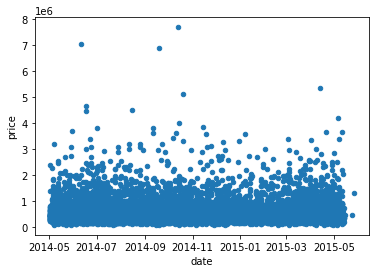

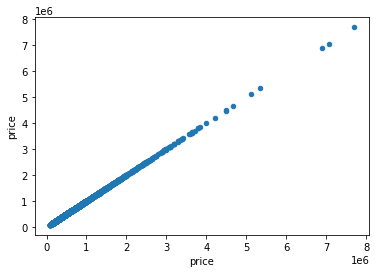

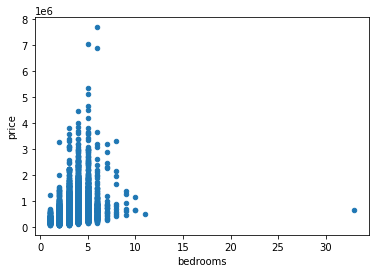

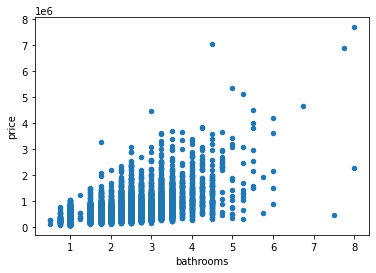

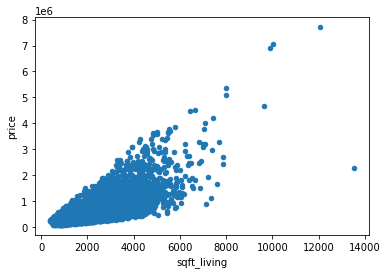

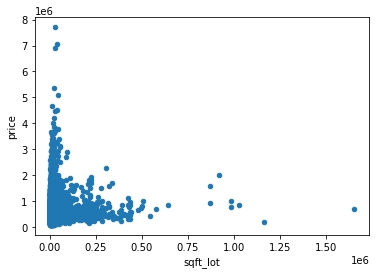

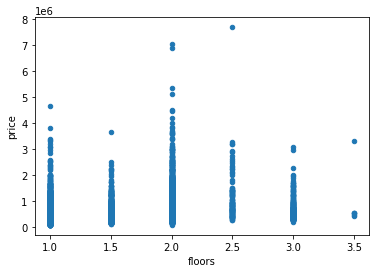

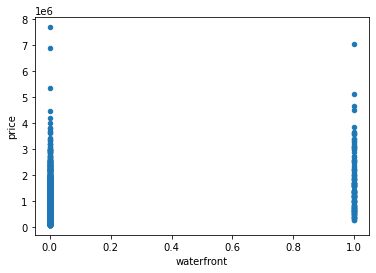

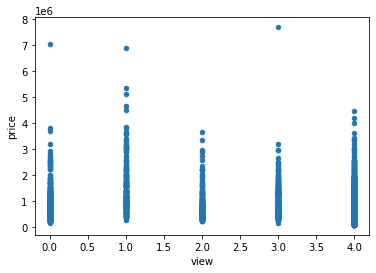

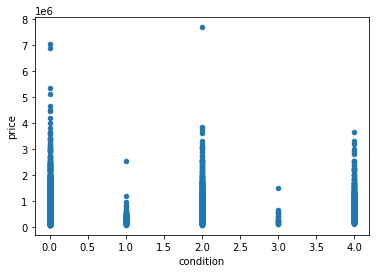

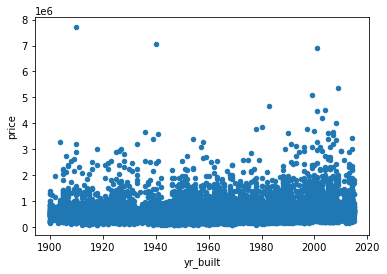

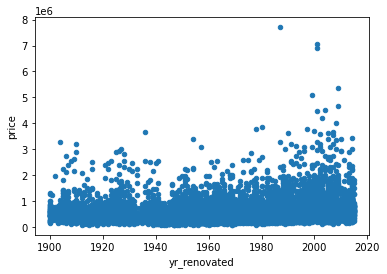

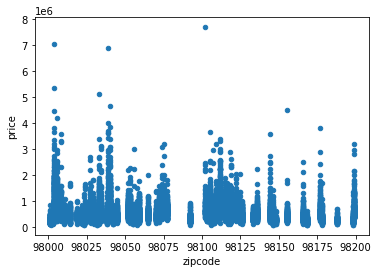

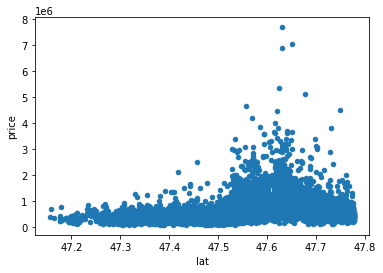

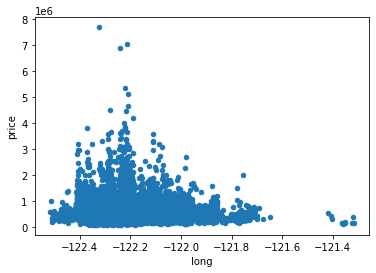

In [105]:
for column in df_new.columns:
    df_new.plot(kind='scatter', x= column, y='price')
    plt.show()

<AxesSubplot:>

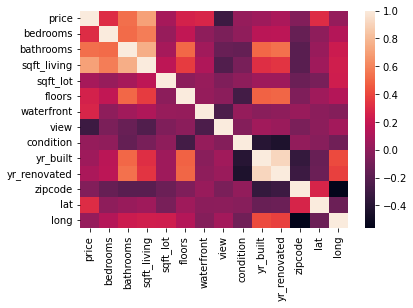

In [46]:
import seaborn as sns
sns.heatmap(df_new.corr())

In [47]:
from sklearn.preprocessing import StandardScaler
import numpy as np



In [54]:

df_pre = df_new.drop(columns = 'date')



In [56]:
#To stnadrize the code you using sklearn !!!! 
from sklearn import preprocessing

X = preprocessing.scale(df_pre)


In [57]:
df_standard = pd.DataFrame(X, columns = df_pre.columns)

In [65]:
y= df_standard['price']
X = sm.add_constant(df_standard.drop(columns = ['price','sqft_lot','condition']))

model = sm.OLS(y, X).fit()




/Users/kobidadush/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [66]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     2781.
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:52:29   Log-Likelihood:                -13860.
No. Observations:               15762   AIC:                         2.774e+04
Df Residuals:                   15750   BIC:                         2.784e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.314e-14      0.005   4.98e-12      1.000      -0.009       0.009
bedrooms        -0.1311      0.006    -22.439      0.000      -0.143      -0.120
bathrooms        0.1042      0.008     12.468      0.000       0.088       0.121
sqft_living      0.6836      0.008     87.376      0.000       0.668       0.699
floors           0.0554      0.006      9.557      0.000       0.044       0.067
waterfront       0.1640      0.005     33.982      0.000       0.155       0.173
view            -0.0941      0.005    -18.842      0.000      -0.104      -0.084
yr_built        -0.2153      0.012    -18.522      0.000      -0.238      -0.192
yr_renovated     0.0435      0.012      3.739      0.000       0.021       0.066
zipcode         -0.1044      0.006    -17.711      0.000      -0.116      -0.093
lat              0.2508      0.005     50.994      0.000       0.241       0.260
long            -0.0962      0.006    -16.265      0.000      -0.108      -0.085
==============================================================================
Omnibus:                    11499.643   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           689827.202
Skew:                           2.925   Prob(JB):                         0.00
Kurtosis:                      34.877   Cond. No.                         6.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
model.params

const           2.313774e-14
bedrooms       -1.311447e-01
bathrooms       1.041933e-01
sqft_living     6.836235e-01
floors          5.536395e-02
waterfront      1.639965e-01
view           -9.413728e-02
yr_built       -2.152678e-01
yr_renovated    4.353916e-02
zipcode        -1.043874e-01
lat             2.507792e-01
long           -9.616242e-02
dtype: float64

In [91]:
df_good_condtion = df_new.loc[df_new['condition']>=2]


In [92]:
df_good_condtion

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,4,4,1965,1965,98136,47.5208,-122.393
11,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,4,2,1942,1942,98115,47.6900,-122.292
13,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,4,2,1977,1977,98074,47.6127,-122.045
17,2014-05-29,485000.0,4,1.00,1600,4300,1.5,0,4,2,1916,1916,98103,47.6648,-122.343
18,2014-12-05,189000.0,2,1.00,1200,9850,1.0,0,4,2,1921,1921,98002,47.3089,-122.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20662,2015-03-12,293000.0,2,2.25,1610,1968,2.0,0,4,2,1979,1979,98056,47.5184,-122.196
20681,2015-05-08,360000.0,4,1.75,2010,12188,1.0,0,4,2,1960,1960,98059,47.5013,-122.147
21063,2015-03-12,294570.0,3,1.00,1140,8400,1.0,0,4,2,1960,1960,98059,47.5022,-122.144
21287,2015-04-29,465000.0,3,1.00,1150,18200,1.0,0,4,4,1959,1959,98058,47.4262,-122.187


In [93]:
df_pre_1 = df_good_condtion.drop(columns = 'date')

In [94]:
df_pre_1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
3,604000.0,4,3.00,1960,5000,1.0,0,4,4,1965,1965,98136,47.5208,-122.393
11,468000.0,2,1.00,1160,6000,1.0,0,4,2,1942,1942,98115,47.6900,-122.292
13,400000.0,3,1.75,1370,9680,1.0,0,4,2,1977,1977,98074,47.6127,-122.045
17,485000.0,4,1.00,1600,4300,1.5,0,4,2,1916,1916,98103,47.6648,-122.343
18,189000.0,2,1.00,1200,9850,1.0,0,4,2,1921,1921,98002,47.3089,-122.210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20662,293000.0,2,2.25,1610,1968,2.0,0,4,2,1979,1979,98056,47.5184,-122.196
20681,360000.0,4,1.75,2010,12188,1.0,0,4,2,1960,1960,98059,47.5013,-122.147
21063,294570.0,3,1.00,1140,8400,1.0,0,4,2,1960,1960,98059,47.5022,-122.144
21287,465000.0,3,1.00,1150,18200,1.0,0,4,4,1959,1959,98058,47.4262,-122.187


In [95]:
X = preprocessing.scale(df_pre_1)

In [96]:
df_pre_1 = pd.DataFrame(X, columns = df_pre_1.columns)

In [102]:
y= df_pre_1['price']
X = sm.add_constant(df_pre_1.drop(columns = ['price','sqft_lot','condition','yr_renovated','bedrooms','bathrooms']))

model = sm.OLS(y, X).fit()

/Users/kobidadush/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [103]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1297.
Date:                Mon, 28 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:27:28   Log-Likelihood:                -4777.0
No. Observations:                5410   AIC:                             9572.
Df Residuals:                    5401   BIC:                             9631.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.531e-15      0.008   4.44e-13      1.000      -0.016       0.016
sqft_living     0.6278      0.009     67.205      0.000       0.609       0.646
floors          0.0722      0.009      8.223      0.000       0.055       0.089
waterfront      0.1679      0.008     20.367      0.000       0.152       0.184
view           -0.1198      0.009    -13.974      0.000      -0.137      -0.103
yr_built       -0.1592      0.010    -16.741      0.000      -0.178      -0.141
zipcode        -0.1130      0.011    -10.760      0.000      -0.134      -0.092
lat             0.2521      0.009     29.052      0.000       0.235       0.269
long           -0.0532      0.010     -5.152      0.000      -0.073      -0.033
==============================================================================
Omnibus:                     3518.558   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           174245.069
Skew:                           2.474   Prob(JB):                         0.00
Kurtosis:                      30.359   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
df_pre_1.corr()['price']

price           1.000000
bedrooms        0.284170
bathrooms       0.549745
sqft_living     0.710660
sqft_lot        0.045862
floors          0.369606
waterfront      0.252000
view           -0.330501
condition       0.099993
yr_built       -0.093957
yr_renovated   -0.056019
zipcode         0.047506
lat             0.352285
long           -0.084262
Name: price, dtype: float64